In [ ]:
m#!pip install transformers==4.16.0
#!pip install pydub

from google.colab import drive
drive.mount("/content/drive")

# install requirements
import sys

if 'google.colab' in sys.modules:
    print('Running in Colab.')
    #!pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
    !git clone https://github.com/salesforce/BLIP
    %cd BLIP


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running in Colab.
Cloning into 'BLIP'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 277 (delta 137), reused 136 (delta 135), pack-reused 112
Receiving objects: 100% (277/277), 7.03 MiB | 30.01 MiB/s, done.
Resolving deltas: 100% (153/153), done.
/content/BLIP/BLIP


In [ ]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://media.gettyimages.com/id/855782638/photo/young-man-on-bicycle-towing-girl-on-roller-skates.jpg?s=2048x2048&w=gi&k=20&c=_yLi3aLQDkVR4skzUkHGxHFWyZXAveYhVsTRU9-YKOs='
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image



with open('/content/drive/MyDrive/FYP/main/question.txt','r') as file:
    transcription = " ".join(line.rstrip() for line in file)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fairscale: filename=fairscale-0.4.13-py3-none-any.whl size=332106 sha256=f6ac19a7ab2811a1552b6d128c74daea2f6a1b9223b416383d284e7f42ca045c
  Stored in directory: /root/.cache/pip/wheels/78/a4/c0/fb0a7ef03cff161611c3fa40c6cf898f76e58ec421b88e8cb3
Successfully built fairscale


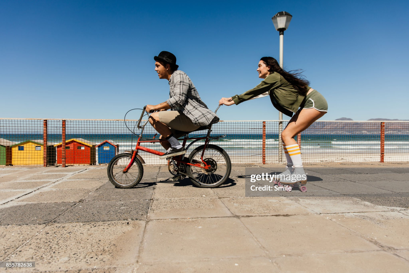

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.35G/1.35G [00:15<00:00, 91.8MB/s]


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: green shirt and black shorts


In [ ]:


from models.blip_vqa import blip_vqa

image_size = 480
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'

model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

question = transcription + '?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('answer: '+answer[0])


In [ ]:
!curl https://dl.fbaipublicfiles.com/mms/tts/eng.tar.gz --output eng.tar.gz #update lang


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128M  100  128M    0     0   240M      0 --:--:-- --:--:-- --:--:--  240M


In [ ]:
!mkdir -p data && tar -xzf eng.tar.gz -C data/ #update langcode


In [ ]:
from ttsmms import TTS

tts=TTS("data/eng") #update lang code
wav=tts.synthesis(answer[0])

In [ ]:
from IPython.display import Audio
audio = Audio(wav["x"], rate=wav["sampling_rate"])

audio

In [ ]:
with open('/content/drive/MyDrive/FYP/main/output.wav', 'wb') as f:
    f.write(audio.data)